# Sign Language Gesture Detection and Translation

*Objective* : To create a model that recognizes ASL Gestures and translate it to different languages using NLP

## Importing Dependencies

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import mediapipe as mp
import os
import time
import sklearn

In [118]:
tf.__version__

'2.11.1'

## Creating a Mediapipe model

In [119]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_drawing_styles = mp.solutions.drawing_styles
# mp_hands = mp.solutions.hands 

In [120]:
def mediapipe_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) #color conversion
    image.flags.writeable = False                 # image is no longer writable
    results = model.process(image)               # make prediction
    image.flags.writeable = True                  # image is now writable
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image, results

In [5]:
def draw_landmarks(image, results):
    # Draw Face, Pose, Hand Connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [121]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [12]:
mp_drawing.draw_landmarks??

In [122]:
cap = cv.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:

    while cap.isOpened():

        # Read feed
        ret , frame = cap.read()

        # Make detection
        image , results = mediapipe_detection(frame, holistic)
        
        # Draw Landmarks
        draw_styled_landmarks(image, results)
        
        cv.imshow('frame',image)
        
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

In [123]:
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [78]:
results.face_landmarks.landmark

[x: 0.48511082
y: 0.6050721
z: -0.028696284
, x: 0.47766304
y: 0.55568814
z: -0.062003616
, x: 0.48057738
y: 0.56843495
z: -0.030326607
, x: 0.46206796
y: 0.49934575
z: -0.048489835
, x: 0.47560057
y: 0.5390455
z: -0.06680261
, x: 0.47328734
y: 0.5153372
z: -0.06319876
, x: 0.46818346
y: 0.4570443
z: -0.03531116
, x: 0.38906485
y: 0.46209636
z: 0.015312271
, x: 0.4647316
y: 0.4212055
z: -0.030593015
, x: 0.46242353
y: 0.40067697
z: -0.03475473
, x: 0.45394042
y: 0.31939113
z: -0.026403353
, x: 0.4860405
y: 0.6123779
z: -0.026692068
, x: 0.4867032
y: 0.616908
z: -0.022391789
, x: 0.48715162
y: 0.6179233
z: -0.016822094
, x: 0.48795038
y: 0.6229512
z: -0.0135206655
, x: 0.48857605
y: 0.6289213
z: -0.015169047
, x: 0.48941845
y: 0.63656753
z: -0.017360017
, x: 0.49045193
y: 0.6445645
z: -0.015286273
, x: 0.49281615
y: 0.66075337
z: -0.0032816946
, x: 0.47888303
y: 0.5630886
z: -0.05545811
, x: 0.4680954
y: 0.56197983
z: -0.038527384
, x: 0.34051222
y: 0.4103395
z: 0.0683979
, x: 0.4239386

In [124]:
len(results.face_landmarks.landmark)

468

In [125]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [81]:
frame

array([[[ 32,  32,  41],
        [ 28,  31,  39],
        [ 25,  30,  37],
        ...,
        [149, 151, 138],
        [152, 153, 139],
        [156, 157, 143]],

       [[ 30,  31,  40],
        [ 27,  30,  38],
        [ 26,  30,  37],
        ...,
        [150, 151, 138],
        [154, 153, 139],
        [156, 155, 142]],

       [[ 32,  32,  41],
        [ 29,  31,  39],
        [ 27,  30,  37],
        ...,
        [155, 152, 138],
        [159, 155, 142],
        [160, 156, 143]],

       ...,

       [[108,  85,  66],
        [109,  86,  67],
        [109,  87,  66],
        ...,
        [ 18,  14,  40],
        [ 15,  10,  36],
        [ 14,   9,  35]],

       [[106,  83,  63],
        [108,  87,  66],
        [110,  89,  68],
        ...,
        [ 15,  13,  40],
        [ 12,   9,  36],
        [ 11,   8,  35]],

       [[107,  84,  64],
        [108,  87,  66],
        [111,  90,  69],
        ...,
        [ 13,  11,  39],
        [ 10,   8,  35],
        [ 10,   8,  35]]

In [126]:
draw_styled_landmarks(frame, results)

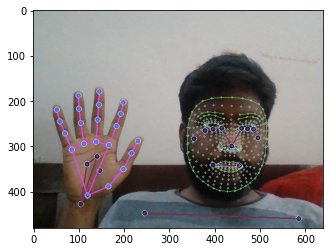

In [127]:
plt.imshow(cv.cvtColor(frame,cv.COLOR_BGR2RGB))

## Extract Keypoint Values

In [128]:
print(results.pose_landmarks.landmark[-1].x,
results.pose_landmarks.landmark[-1].y,
results.pose_landmarks.landmark[-1].z,
results.pose_landmarks.landmark[-1].visibility)

0.5301219820976257 3.935519218444824 -0.7353902459144592 0.0022696813102811575


In [129]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [27]:
test

array([5.10931075e-01, 3.86689258e+00, 9.90449309e-01, 2.59507869e-05])

In [28]:
pose

[array([ 0.57724637,  0.49517283, -1.09489298,  0.99997342]),
 array([ 0.60908735,  0.40004683, -1.02714753,  0.999946  ]),
 array([ 0.63358676,  0.39857692, -1.02706575,  0.99993461]),
 array([ 0.65342861,  0.3980633 , -1.02746785,  0.99993116]),
 array([ 0.52973402,  0.41315398, -1.00807405,  0.99995691]),
 array([ 0.50264448,  0.41973439, -1.00697494,  0.99995977]),
 array([ 0.48126903,  0.42805582, -1.00717604,  0.9999668 ]),
 array([ 0.67897278,  0.4388462 , -0.50080812,  0.99992943]),
 array([ 0.44924179,  0.47801775, -0.37653983,  0.99997348]),
 array([ 0.62862158,  0.57680494, -0.89750081,  0.9999702 ]),
 array([ 0.52502668,  0.59560817, -0.86258209,  0.9999699 ]),
 array([ 0.91082513,  0.86271495, -0.21931934,  0.99819088]),
 array([ 0.34176809,  0.91901028, -0.30796239,  0.9996568 ]),
 array([ 1.08847725,  1.40000606, -0.22711976,  0.22599502]),
 array([ 0.13704215,  1.35966551, -1.30067658,  0.89925241]),
 array([ 1.13189554,  1.84158087, -0.41730103,  0.12044904]),
 array([

In [29]:
len(results.pose_landmarks.landmark)

33

In [30]:
len(pose) # 33 * 4 (x,y,z,visibility)

33

In [242]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [243]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [132]:
extract_keypoints(results)

array([ 0.68541217,  0.62463993, -1.35837209, ...,  0.08167659,
        0.4582769 , -0.0757453 ])

In [133]:
print(f"pose : {pose.shape}\nface : {face.shape}\nleft hand : {lh.shape}\nright hand : {rh.shape}")

pose : (132,)
face : (1404,)
left hand : (63,)
right hand : (63,)


In [25]:
extract_keypoints(results).shape

(1662,)

## Setup Folders for Collection

In [18]:
# Data_path = os.path.join('MP Data')
# features = np.array(['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

In [134]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP Data') 

# Actions that we try to detect
actions = np.array(['hello','thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [135]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            print(action, sequence, end='')
        

In [136]:
cap = cv.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv.LINE_AA)
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv.LINE_AA)
                    # Show to screen
                    cv.imshow('OpenCV Feed', image)
                    cv.waitKey(1000)
                else: 
                    cv.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv.LINE_AA)
                    # Show to screen
                    cv.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv.destroyAllWindows()

In [77]:
cap.release()
cv.destroyAllWindows()

## Preprocess Data and Create Labels and Features

In [137]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [138]:
label_map = {label:num for num, label in enumerate(actions)}

In [139]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [140]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [141]:
np.array(sequences).shape

(90, 30, 1662)

In [142]:
np.array(labels).shape

(90,)

In [143]:
X = np.array(sequences)

In [144]:
X.shape

(90, 30, 1662)

In [145]:
y = to_categorical(labels).astype(int)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [147]:
y_test.shape


(5, 3)

## Build and Train LSTM Neural Network

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [149]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [150]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [151]:
res = [.7, 0.2, 0.1]

In [152]:
actions[np.argmax(res)]

'hello'

In [154]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [155]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 68ms/step - loss: 2.7773 - categorical_accuracy: 0.4235
Epoch 2/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.2521 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.4303 - categorical_accuracy: 0.2588
Epoch 4/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2086 - categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1039 - categorical_accuracy: 0.4353
Epoch 6/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0760 - categorical_accuracy: 0.4118
Epoch 7/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0191 - categorical_accuracy: 0.5765
Epoch 8/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.9470 - categorical_accuracy: 0.5765
Epoch 9/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0355 - categorical_accuracy: 0.6235
E

3/3 [==============================] - 0s 66ms/step - loss: 0.7106 - categorical_accuracy: 0.8471
Epoch 75/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.6291 - categorical_accuracy: 0.8471
Epoch 76/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6492 - categorical_accuracy: 0.7412
Epoch 77/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.5872 - categorical_accuracy: 0.7765
Epoch 78/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.5680 - categorical_accuracy: 0.8118
Epoch 79/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.5117 - categorical_accuracy: 0.8353
Epoch 80/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4530 - categorical_accuracy: 0.8471
Epoch 81/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4115 - categorical_accuracy: 0.8353
Epoch 82/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.3714 - categorical_accuracy: 0.8471
Epoch 

3/3 [==============================] - 0s 63ms/step - loss: 0.6635 - categorical_accuracy: 0.7412
Epoch 147/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6962 - categorical_accuracy: 0.7647
Epoch 148/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.6523 - categorical_accuracy: 0.8000
Epoch 149/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6453 - categorical_accuracy: 0.8000
Epoch 150/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.5931 - categorical_accuracy: 0.8235
Epoch 151/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.5958 - categorical_accuracy: 0.8235
Epoch 152/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.5719 - categorical_accuracy: 0.8471
Epoch 153/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.5597 - categorical_accuracy: 0.8471
Epoch 154/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4866 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 63ms/step - loss: 0.9547 - categorical_accuracy: 0.5294
Epoch 219/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.9467 - categorical_accuracy: 0.5529
Epoch 220/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.9477 - categorical_accuracy: 0.5412
Epoch 221/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9475 - categorical_accuracy: 0.4706
Epoch 222/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.9436 - categorical_accuracy: 0.5176
Epoch 223/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.9385 - categorical_accuracy: 0.5647
Epoch 224/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9479 - categorical_accuracy: 0.5176
Epoch 225/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9688 - categorical_accuracy: 0.4941
Epoch 226/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.9612 - categorical_accuracy: 0.494

3/3 [==============================] - 0s 74ms/step - loss: 1.2129 - categorical_accuracy: 0.3176
Epoch 291/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1536 - categorical_accuracy: 0.3176
Epoch 292/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0846 - categorical_accuracy: 0.3176
Epoch 293/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0051 - categorical_accuracy: 0.4941
Epoch 294/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.9483 - categorical_accuracy: 0.6000
Epoch 295/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9311 - categorical_accuracy: 0.6353
Epoch 296/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9378 - categorical_accuracy: 0.5176
Epoch 297/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.9463 - categorical_accuracy: 0.4118
Epoch 298/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.9404 - categorical_accuracy: 0.411

3/3 [==============================] - 0s 65ms/step - loss: 0.4892 - categorical_accuracy: 0.7412
Epoch 363/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4457 - categorical_accuracy: 0.7765
Epoch 364/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4485 - categorical_accuracy: 0.7647
Epoch 365/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4692 - categorical_accuracy: 0.7529
Epoch 366/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4354 - categorical_accuracy: 0.7412
Epoch 367/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4362 - categorical_accuracy: 0.7647
Epoch 368/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.4448 - categorical_accuracy: 0.7529
Epoch 369/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.4399 - categorical_accuracy: 0.7647
Epoch 370/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4320 - categorical_accuracy: 0.788

3/3 [==============================] - 0s 67ms/step - loss: 0.3818 - categorical_accuracy: 0.8471
Epoch 435/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.3440 - categorical_accuracy: 0.8706
Epoch 436/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.3491 - categorical_accuracy: 0.8824
Epoch 437/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.3667 - categorical_accuracy: 0.8471
Epoch 438/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3369 - categorical_accuracy: 0.8824
Epoch 439/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3460 - categorical_accuracy: 0.8471
Epoch 440/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.3624 - categorical_accuracy: 0.8471
Epoch 441/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3253 - categorical_accuracy: 0.8824
Epoch 442/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3015 - categorical_accuracy: 0.894

3/3 [==============================] - 0s 65ms/step - loss: 0.1785 - categorical_accuracy: 0.9529
Epoch 507/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1590 - categorical_accuracy: 0.9647
Epoch 508/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1710 - categorical_accuracy: 0.9529
Epoch 509/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1589 - categorical_accuracy: 0.9529
Epoch 510/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.1511 - categorical_accuracy: 0.9647
Epoch 511/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1509 - categorical_accuracy: 0.9647
Epoch 512/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1523 - categorical_accuracy: 0.9529
Epoch 513/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1454 - categorical_accuracy: 0.9647
Epoch 514/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1500 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 71ms/step - loss: 0.2287 - categorical_accuracy: 0.9294
Epoch 579/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.2163 - categorical_accuracy: 0.9529
Epoch 580/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1896 - categorical_accuracy: 0.9529
Epoch 581/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1923 - categorical_accuracy: 0.9412
Epoch 582/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2614 - categorical_accuracy: 0.8941
Epoch 583/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.2419 - categorical_accuracy: 0.9294
Epoch 584/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.2246 - categorical_accuracy: 0.9412
Epoch 585/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1513 - categorical_accuracy: 0.9647
Epoch 586/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2733 - categorical_accuracy: 0.929

3/3 [==============================] - 0s 70ms/step - loss: 0.4897 - categorical_accuracy: 0.8000
Epoch 651/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.4731 - categorical_accuracy: 0.8118
Epoch 652/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4827 - categorical_accuracy: 0.8000
Epoch 653/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4707 - categorical_accuracy: 0.7647
Epoch 654/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.4695 - categorical_accuracy: 0.7647
Epoch 655/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4897 - categorical_accuracy: 0.7529
Epoch 656/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.5587 - categorical_accuracy: 0.7176
Epoch 657/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.5670 - categorical_accuracy: 0.6941
Epoch 658/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4883 - categorical_accuracy: 0.741

3/3 [==============================] - 0s 71ms/step - loss: 1.0635 - categorical_accuracy: 0.4118
Epoch 723/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0088 - categorical_accuracy: 0.4000
Epoch 724/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0064 - categorical_accuracy: 0.5294
Epoch 725/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.9961 - categorical_accuracy: 0.5176
Epoch 726/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.9516 - categorical_accuracy: 0.5059
Epoch 727/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.9493 - categorical_accuracy: 0.6118
Epoch 728/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.8906 - categorical_accuracy: 0.6941
Epoch 729/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.8793 - categorical_accuracy: 0.5647
Epoch 730/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.9432 - categorical_accuracy: 0.517

3/3 [==============================] - 0s 73ms/step - loss: 0.4820 - categorical_accuracy: 0.8000
Epoch 795/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4724 - categorical_accuracy: 0.8471
Epoch 796/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4817 - categorical_accuracy: 0.8353
Epoch 797/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4612 - categorical_accuracy: 0.8706
Epoch 798/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4422 - categorical_accuracy: 0.8824
Epoch 799/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4510 - categorical_accuracy: 0.8118
Epoch 800/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4175 - categorical_accuracy: 0.8824
Epoch 801/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4402 - categorical_accuracy: 0.8588
Epoch 802/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4605 - categorical_accuracy: 0.776

3/3 [==============================] - 0s 76ms/step - loss: 0.1749 - categorical_accuracy: 0.9647
Epoch 867/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1990 - categorical_accuracy: 0.9412
Epoch 868/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.1932 - categorical_accuracy: 0.9529
Epoch 869/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.2703 - categorical_accuracy: 0.8824
Epoch 870/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.2961 - categorical_accuracy: 0.8941
Epoch 871/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.2736 - categorical_accuracy: 0.9176
Epoch 872/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.2421 - categorical_accuracy: 0.9294
Epoch 873/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1979 - categorical_accuracy: 0.9294
Epoch 874/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1725 - categorical_accuracy: 0.952

3/3 [==============================] - 0s 71ms/step - loss: 0.1092 - categorical_accuracy: 0.9765
Epoch 939/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0927 - categorical_accuracy: 0.9765
Epoch 940/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0825 - categorical_accuracy: 0.9882
Epoch 941/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0927 - categorical_accuracy: 0.9882
Epoch 942/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0964 - categorical_accuracy: 0.9765
Epoch 943/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0772 - categorical_accuracy: 0.9882
Epoch 944/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1000 - categorical_accuracy: 0.9765
Epoch 945/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0964 - categorical_accuracy: 0.9647
Epoch 946/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0881 - categorical_accuracy: 0.976

3/3 [==============================] - 0s 72ms/step - loss: 0.1018 - categorical_accuracy: 0.9647
Epoch 1011/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0833 - categorical_accuracy: 0.9882
Epoch 1012/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0681 - categorical_accuracy: 0.9882
Epoch 1013/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0885 - categorical_accuracy: 0.9882
Epoch 1014/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.1485 - categorical_accuracy: 0.9412
Epoch 1015/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0838 - categorical_accuracy: 0.9882
Epoch 1016/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0554 - categorical_accuracy: 0.9882
Epoch 1017/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0658 - categorical_accuracy: 0.9882
Epoch 1018/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0487 - categorical_accurac

3/3 [==============================] - 0s 71ms/step - loss: 0.2896 - categorical_accuracy: 0.9294
Epoch 1083/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.2429 - categorical_accuracy: 0.9412
Epoch 1084/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.2268 - categorical_accuracy: 0.9529
Epoch 1085/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2047 - categorical_accuracy: 0.9647
Epoch 1086/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3276 - categorical_accuracy: 0.8824
Epoch 1087/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2529 - categorical_accuracy: 0.9176
Epoch 1088/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.2666 - categorical_accuracy: 0.9176
Epoch 1089/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.3366 - categorical_accuracy: 0.8941
Epoch 1090/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.2473 - categorical_accurac

Epoch 1154/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4850 - categorical_accuracy: 0.7765
Epoch 1155/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4731 - categorical_accuracy: 0.7647
Epoch 1156/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4702 - categorical_accuracy: 0.7882
Epoch 1157/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4405 - categorical_accuracy: 0.7882
Epoch 1158/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.4405 - categorical_accuracy: 0.7765
Epoch 1159/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.4195 - categorical_accuracy: 0.8000
Epoch 1160/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.4036 - categorical_accuracy: 0.8235
Epoch 1161/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.3929 - categorical_accuracy: 0.8353
Epoch 1162/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.37

3/3 [==============================] - 0s 78ms/step - loss: 0.0748 - categorical_accuracy: 0.9765
Epoch 1226/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0758 - categorical_accuracy: 0.9765
Epoch 1227/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0752 - categorical_accuracy: 0.9765
Epoch 1228/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0724 - categorical_accuracy: 0.9882
Epoch 1229/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0742 - categorical_accuracy: 0.9882
Epoch 1230/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0789 - categorical_accuracy: 0.9765
Epoch 1231/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0881 - categorical_accuracy: 0.9647
Epoch 1232/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0716 - categorical_accuracy: 0.9765
Epoch 1233/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0789 - categorical_accurac

3/3 [==============================] - 0s 78ms/step - loss: 0.0600 - categorical_accuracy: 0.9765
Epoch 1298/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0527 - categorical_accuracy: 0.9882
Epoch 1299/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0482 - categorical_accuracy: 0.9882
Epoch 1300/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0492 - categorical_accuracy: 0.9882
Epoch 1301/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0466 - categorical_accuracy: 0.9882
Epoch 1302/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0501 - categorical_accuracy: 0.9882
Epoch 1303/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0484 - categorical_accuracy: 0.9882
Epoch 1304/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0496 - categorical_accuracy: 0.9882
Epoch 1305/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0465 - categorical_accurac

3/3 [==============================] - 0s 78ms/step - loss: 0.0384 - categorical_accuracy: 0.9882
Epoch 1370/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0377 - categorical_accuracy: 0.9882
Epoch 1371/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0390 - categorical_accuracy: 0.9882
Epoch 1372/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0381 - categorical_accuracy: 0.9882
Epoch 1373/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0403 - categorical_accuracy: 0.9882
Epoch 1374/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0373 - categorical_accuracy: 0.9882
Epoch 1375/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0382 - categorical_accuracy: 0.9882
Epoch 1376/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0378 - categorical_accuracy: 0.9882
Epoch 1377/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0367 - categorical_accurac

3/3 [==============================] - 0s 79ms/step - loss: 0.0844 - categorical_accuracy: 0.9765
Epoch 1442/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0901 - categorical_accuracy: 0.9765
Epoch 1443/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0852 - categorical_accuracy: 0.9765
Epoch 1444/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0854 - categorical_accuracy: 0.9765
Epoch 1445/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0830 - categorical_accuracy: 0.9765
Epoch 1446/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0794 - categorical_accuracy: 0.9765
Epoch 1447/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0781 - categorical_accuracy: 0.9765
Epoch 1448/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0784 - categorical_accuracy: 0.9765
Epoch 1449/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0760 - categorical_accurac

3/3 [==============================] - 0s 79ms/step - loss: 0.0340 - categorical_accuracy: 0.9882
Epoch 1514/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0307 - categorical_accuracy: 0.9882
Epoch 1515/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0306 - categorical_accuracy: 0.9882
Epoch 1516/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0307 - categorical_accuracy: 0.9882
Epoch 1517/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0320 - categorical_accuracy: 0.9882
Epoch 1518/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0348 - categorical_accuracy: 0.9882
Epoch 1519/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0293 - categorical_accuracy: 0.9882
Epoch 1520/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0339 - categorical_accuracy: 0.9882
Epoch 1521/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0347 - categorical_accurac

3/3 [==============================] - 0s 79ms/step - loss: 0.0278 - categorical_accuracy: 0.9882
Epoch 1586/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0254 - categorical_accuracy: 0.9882
Epoch 1587/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0242 - categorical_accuracy: 0.9882
Epoch 1588/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0240 - categorical_accuracy: 0.9882
Epoch 1589/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0284 - categorical_accuracy: 0.9882
Epoch 1590/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0283 - categorical_accuracy: 0.9882
Epoch 1591/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0395 - categorical_accuracy: 0.9765
Epoch 1592/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0570 - categorical_accuracy: 0.9765
Epoch 1593/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1534 - categorical_accurac

3/3 [==============================] - 0s 81ms/step - loss: 0.0786 - categorical_accuracy: 0.9765
Epoch 1658/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.0772 - categorical_accuracy: 0.9765
Epoch 1659/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0659 - categorical_accuracy: 0.9765
Epoch 1660/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0865 - categorical_accuracy: 0.9647
Epoch 1661/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.1331 - categorical_accuracy: 0.9529
Epoch 1662/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1393 - categorical_accuracy: 0.9529
Epoch 1663/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1753 - categorical_accuracy: 0.9412
Epoch 1664/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.5172 - categorical_accuracy: 0.6235
Epoch 1665/2000
3/3 [==============================] - 0s 81ms/step - loss: 4.4583 - categorical_accurac

3/3 [==============================] - 0s 80ms/step - loss: 0.0591 - categorical_accuracy: 0.9882
Epoch 1730/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0602 - categorical_accuracy: 0.9882
Epoch 1731/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0563 - categorical_accuracy: 0.9882
Epoch 1732/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0526 - categorical_accuracy: 0.9882
Epoch 1733/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0511 - categorical_accuracy: 0.9882
Epoch 1734/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0491 - categorical_accuracy: 0.9882
Epoch 1735/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0487 - categorical_accuracy: 0.9882
Epoch 1736/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0477 - categorical_accuracy: 0.9882
Epoch 1737/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0471 - categorical_accurac

3/3 [==============================] - 0s 81ms/step - loss: 0.0272 - categorical_accuracy: 0.9882
Epoch 1802/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0271 - categorical_accuracy: 0.9882
Epoch 1803/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0270 - categorical_accuracy: 0.9882
Epoch 1804/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0266 - categorical_accuracy: 0.9882
Epoch 1805/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0253 - categorical_accuracy: 0.9882
Epoch 1806/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0274 - categorical_accuracy: 0.9882
Epoch 1807/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0261 - categorical_accuracy: 0.9882
Epoch 1808/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0277 - categorical_accuracy: 0.9882
Epoch 1809/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0258 - categorical_accurac

3/3 [==============================] - 0s 80ms/step - loss: 0.0234 - categorical_accuracy: 0.9882
Epoch 1874/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0222 - categorical_accuracy: 0.9882
Epoch 1875/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0215 - categorical_accuracy: 0.9882
Epoch 1876/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0220 - categorical_accuracy: 0.9882
Epoch 1877/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0213 - categorical_accuracy: 0.9882
Epoch 1878/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0211 - categorical_accuracy: 0.9882
Epoch 1879/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0216 - categorical_accuracy: 0.9882
Epoch 1880/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0213 - categorical_accuracy: 0.9882
Epoch 1881/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0215 - categorical_accurac

3/3 [==============================] - 0s 80ms/step - loss: 0.0196 - categorical_accuracy: 0.9882
Epoch 1946/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0233 - categorical_accuracy: 0.9882
Epoch 1947/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0171 - categorical_accuracy: 0.9882
Epoch 1948/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0244 - categorical_accuracy: 0.9882
Epoch 1949/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0139 - categorical_accuracy: 0.9882
Epoch 1950/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0208 - categorical_accuracy: 0.9882
Epoch 1951/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0180 - categorical_accuracy: 0.9882
Epoch 1952/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0141 - categorical_accuracy: 0.9882
Epoch 1953/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0174 - categorical_accurac

In [157]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

## Make Predictions

In [194]:
res = model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [195]:
actions[np.argmax(res[4])]

'thanks'

In [197]:
actions[np.argmax(y_test[4])]

'thanks'

In [198]:
model.save('action.h5')

In [203]:
model.load_weights('action.h5')

## Evaluation using Confusion Matrix and Accuracy

In [204]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [208]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


In [209]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [211]:
yhat

[0, 1, 1, 0, 1]

In [212]:
ytrue

[0, 1, 1, 0, 1]

In [213]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [214]:
accuracy_score(ytrue, yhat)

1.0

## Test in Real Time

In [224]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv.putText(output_frame, actions[num], (0, 85+num*40), cv.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv.LINE_AA)
        
    return output_frame

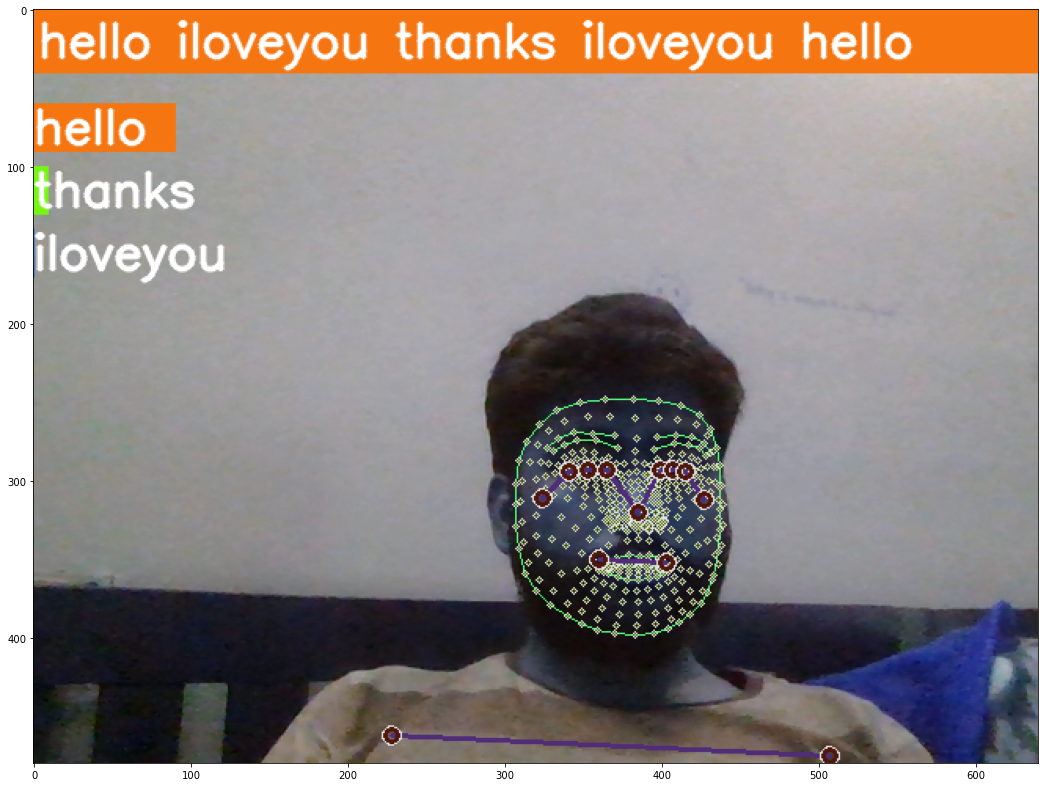

In [239]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [254]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.9

cap = cv.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv.putText(image, ' '.join(sentence), (3,30), 
                       cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
        
        # Show to screen
        cv.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
thanks
<class 'media

1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<

1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
ilov

In [251]:
cap.release()
cv.destroyAllWindows()